## Introduction
-----
You (as an intrepid electrical engineer) wish to determine the resistance of an electrical component using Ohm's law. You remember from your high school circuit classes that $$V = RI$$ 

where $V$ is the voltage in volts, $R$ is resistance in ohms, and $I$ is electrical current in amperes. Using a multimeter, you measure the voltage drop across the resistor at various current values and collect the following data:

| Current (A) | Voltage (V) |
|-------------|-------------|
| 0.2         | 1.23        |
| 0.3         | 1.38        |
| 0.4         | 2.06        |
| 0.5         | 2.47        |
| 0.6         | 3.17        |

With the data in hand, your goals are to: 
1. Fit a line through the origin (i.e., determine the parameter $R$ for $y = Rx$) to this data by using the method of least squares. You may assume that all measurements are of equal importance. 
2. Consider what the best estimate of the resistance is, in ohms, for this component.

## Getting Started
----

The first step is to import the neccesary Python modules and load the current values and voltage measurements into NumPy arrays:

In [1]:
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt

# Store the voltage and current data as column vectors.
I = np.array([[0.2, 0.3, 0.4, 0.5, 0.6]]).T
V = np.array([[1.23, 1.38, 2.06, 2.47, 3.17]]).T

In [2]:
V

array([[1.23],
       [1.38],
       [2.06],
       [2.47],
       [3.17]])

It's always useful to plot the measurements - can you see the linear relationship between current and voltage?

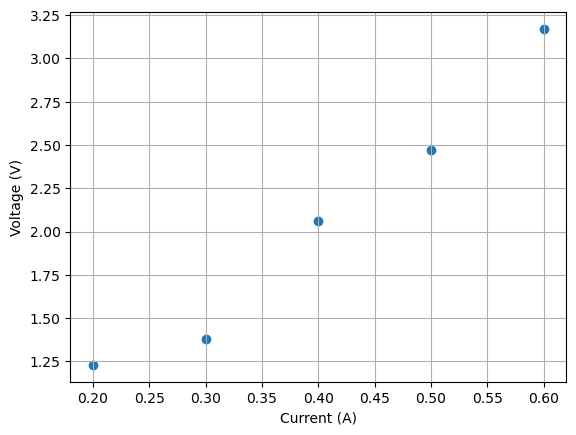

In [3]:
plt.scatter(I, V)
plt.xlabel('Current (A)')
plt.ylabel('Voltage (V)')
plt.grid(True)
plt.show()

## Estimating the Slope Parameter
----
Let's try to estimate the slope parameter $R$ (i.e., the resistance) using the least squares formulation from Module 1, Lesson 1 - "The Squared Error Criterion and the Method of Least Squares":

\begin{align}
\hat{R} = \left(\mathbf{H}^T\mathbf{H}\right)^{-1}\mathbf{H}^T\mathbf{y}
\end{align}

If we know that we're looking for the slope parameter $R$, how do we define the matrix $\mathbf{H}$ (the Jacobian matrix) and vector $\mathbf{y}$ (containing the stacked voltage/current measurements)? Hint #1: When reviewing material from Module 1, carefully note the relationship defined by Ohm's law (this problem is slightly different from the example provided in the Module). Hint #2: the Jacobian matrix contains the partial derivatives of the measurement equation with respect to the parameter(s) of interest.

In [15]:
I

array([[0.2],
       [0.3],
       [0.4],
       [0.5],
       [0.6]])

In [16]:
I.ravel()

array([0.2, 0.3, 0.4, 0.5, 0.6])

In [10]:
H = np.ones((5, 2))
H[:, 0] = I.ravel()
H

array([[0.2, 1. ],
       [0.3, 1. ],
       [0.4, 1. ],
       [0.5, 1. ],
       [0.6, 1. ]])

In [17]:
R = inv(H.T.dot(H)).dot(H.T.dot(V))

print('The slope parameter of the best-fit line (i.e., the resistance) is:')
print(R[0, 0])

The slope parameter of the best-fit line (i.e., the resistance) is:
4.970000000000006


In [18]:
R

array([[4.97 ],
       [0.074]])

## Plotting the Results
----
Now let's plot our result. How do we relate our linear parameter fit to the resistance value in ohms?

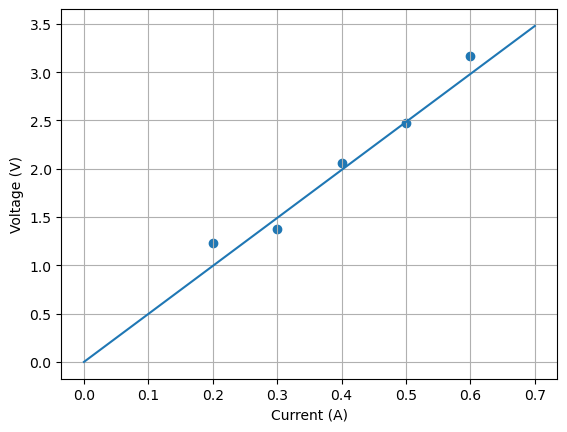

In [19]:
I_line = np.arange(0, 0.8, 0.1).reshape(8, 1)
V_line = R[0]*I_line

plt.scatter(I, V)
plt.plot(I_line, V_line)
plt.xlabel('Current (A)')
plt.ylabel('Voltage (V)')
plt.grid(True)
plt.show()

If you have implemented the steps correctly, the slope parameter $\hat{R}$ should be very close (within a couple of tenths of ohms) to the actual resistance value of $R = 5~\Omega$. However, the estimated value will not match the true resistance value exactly, since we have only a limited number of noisy measurements.